In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [5]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [6]:
binary_df = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | 
               (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3548 entries, 0 to 9088
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          3548 non-null   object
 1   emotion_in_tweet_is_directed_at                     3191 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  3548 non-null   object
dtypes: object(3)
memory usage: 110.9+ KB


In [7]:
binary_df_nulls = binary_df[binary_df['emotion_in_tweet_is_directed_at'].isna() == True]
binary_df_nulls

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
46,Hand-Held Û÷HoboÛª: Drafthouse launches Û÷H...,NaN,Positive emotion
64,Again? RT @mention Line at the Apple store is ...,NaN,Negative emotion
68,Boooo! RT @mention Flipboard is developing an ...,NaN,Negative emotion
103,Know that &quot;dataviz&quot; translates to &q...,NaN,Negative emotion
112,Spark for #android is up for a #teamandroid aw...,NaN,Positive emotion
...,...,...,...
9011,apparently the line to get an iPad at the #sxs...,NaN,Positive emotion
9043,Hey is anyone doing #sxsw signing up for the g...,NaN,Negative emotion
9049,@mention you can buy my used iPad and I'll pic...,NaN,Positive emotion
9052,@mention You could buy a new iPad 2 tmrw at th...,NaN,Positive emotion


In [8]:
binary_df_nonulls = binary_df.dropna()
binary_df_nonulls = binary_df_nonulls.drop(columns = 'emotion_in_tweet_is_directed_at')
binary_df_nonulls['is_there_an_emotion_directed_at_a_brand_or_product'] = binary_df_nonulls['is_there_an_emotion_directed_at_a_brand_or_product'].apply(lambda x: 0 if x == 'Negative emotion' else 1)
binary_df_nonulls

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,1
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1
...,...,...
9077,@mention your PR guy just convinced me to swit...,1
9079,&quot;papyrus...sort of like the ipad&quot; - ...,1
9080,Diller says Google TV &quot;might be run over ...,0
9085,I've always used Camera+ for my iPhone b/c it ...,1


NLTK (Natural Language ToolKit)
- Stop Word Removal - reduce dimensionality, frequency distributions

from nltk.corpus import stopwords
import string

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

from nltk import word_tokenize

tokens = word_tokenize(some_text_data)

stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]

from  nltk import FreqDist
freqdist = FreqDist(tokens)

most_common = freqdist.most_common(200)

- Regular Expressions - Useful during Tokenization (define rules for splitting strings into separate tokens)


- Stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('feet') # foot
lemmatizer.lemmatize('running') # run

- Bigrams and Mutual Information Score

In [12]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re
from sklearn.model_selection import train_test_split

## Pre-Processing
- Capitalization
- Apostrophes
- Numbers

In [50]:
X = binary_df_nonulls['tweet_text']
y = binary_df_nonulls['is_there_an_emotion_directed_at_a_brand_or_product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [53]:
X_train

,tweet_text
4840,Idea is to combine Google analytics with other...
487,"Hey #sxsw exhibitors, why not capture your boo..."
14,Great #sxsw ipad app from @madebymany: http://...
8795,Got a craving? #SXSW minds created an app for ...
1113,They'd be stupid not to. // Apple is opening a...
...,...
2931,*g* rt @mention Love the Apple pop-up store a...
3024,Texas Observer Tomlinson says they would doubl...
3481,What's behind #Android's race to No. 1? {link}...
2340,#sxsw #enchantment: @mention &quot;No one uses...


In [54]:
X_train['tweet_text'] = X_train['tweet_text'].str.lower()
X_train

,tweet_text
4840,idea is to combine google analytics with other...
487,"hey #sxsw exhibitors, why not capture your boo..."
14,great #sxsw ipad app from @madebymany: http://...
8795,got a craving? #sxsw minds created an app for ...
1113,they'd be stupid not to. // apple is opening a...
...,...
2931,*g* rt @mention love the apple pop-up store a...
3024,texas observer tomlinson says they would doubl...
3481,what's behind #android's race to no. 1? {link}...
2340,#sxsw #enchantment: @mention &quot;no one uses...


In [55]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"
tokenizer = RegexpTokenizer(basic_token_pattern)

X_train['tokenized'] = X_train['tweet_text'].apply(tokenizer.tokenize)
X_train

,tweet_text,tokenized
4840,idea is to combine google analytics with other...,"[idea, is, to, combine, google, analytics, wit..."
487,"hey #sxsw exhibitors, why not capture your boo...","[hey, sxsw, exhibitors, why, not, capture, you..."
14,great #sxsw ipad app from @madebymany: http://...,"[great, sxsw, ipad, app, from, madebymany, htt..."
8795,got a craving? #sxsw minds created an app for ...,"[got, craving, sxsw, minds, created, an, app, ..."
1113,they'd be stupid not to. // apple is opening a...,"[they, be, stupid, not, to, apple, is, opening..."
...,...,...
2931,*g* rt @mention love the apple pop-up store a...,"[rt, mention, love, the, apple, pop, up, store..."
3024,texas observer tomlinson says they would doubl...,"[texas, observer, tomlinson, says, they, would..."
3481,what's behind #android's race to no. 1? {link}...,"[what, behind, android, race, to, no, link, sm..."
2340,#sxsw #enchantment: @mention &quot;no one uses...,"[sxsw, enchantment, mention, quot, no, one, us..."


## Frequency Distributions
- Freq_Dist()

In [59]:
from nltk import FreqDist
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

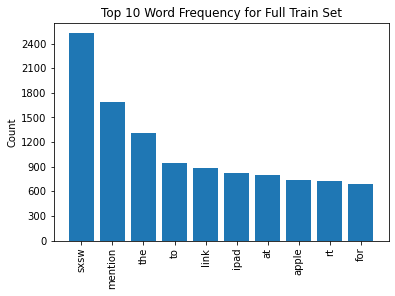

In [60]:
train_freq_dist = FreqDist(X_train['tokenized'].explode())
visualize_top_10(train_freq_dist, 'Top 10 Word Frequency for Full Train Set')

## Fit baseline Model

In [61]:
# Import the relevant vectorizer class
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate a vectorizer with max_features=10
# (we are using the default token pattern)
tfidf = TfidfVectorizer(max_features = 10)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train['tweet_text'])

# Visually inspect the 10 most common words
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,apple,at,for,ipad,link,mention,rt,sxsw,the,to
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424774,0.000000,0.905300
1,0.000000,0.000000,0.000000,0.686595,0.651188,0.000000,0.000000,0.323331,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.904703,0.000000,0.000000,0.000000,0.426042,0.000000,0.000000
3,0.000000,0.000000,0.721435,0.000000,0.620235,0.000000,0.000000,0.307962,0.000000,0.000000
4,0.408991,0.000000,0.420402,0.381081,0.361429,0.299890,0.000000,0.179459,0.334232,0.382471
...,...,...,...,...,...,...,...,...,...,...
2388,0.350577,0.671225,0.360357,0.000000,0.000000,0.257058,0.353375,0.153827,0.286495,0.000000
2389,0.000000,0.000000,0.000000,0.904703,0.000000,0.000000,0.000000,0.426042,0.000000,0.000000
2390,0.000000,0.000000,0.000000,0.000000,0.650069,0.000000,0.000000,0.322775,0.000000,0.687915
2391,0.760248,0.000000,0.000000,0.000000,0.000000,0.557445,0.000000,0.333584,0.000000,0.000000


In [62]:
# Import relevant class and function
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vecto

array([0.83507307, 0.83507307, 0.83507307, 0.83682008, 0.83472803])

In [63]:
y_train.value_counts(normalize=True)

is_there_an_emotion_directed_at_a_brand_or_product
1                                                     0.835353
0                                                     0.164647
dtype: float64

## Removing Stop Words and Punctuation

In [64]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stopwords_list[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [65]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    new_list = []
    for token in token_list:
        if token not in stopwords_list:
            new_list.append(token)
        else:
            continue
    return new_list

In [66]:
X_train["text_without_stopwords"] = X_train["tokenized"].apply(remove_stopwords)

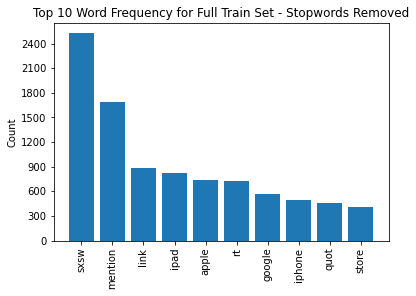

In [67]:
train_freq_dist_stopwords_removed = FreqDist(X_train['text_without_stopwords'].explode())
visualize_top_10(train_freq_dist_stopwords_removed, 'Top 10 Word Frequency for Full Train Set - Stopwords Removed')

In [69]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(
    max_features=10,
    stop_words=stopwords_list
)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["tweet_text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,apple,google,ipad,iphone,link,mention,quot,rt,store,sxsw
0,0.000000,0.928578,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371136
1,0.000000,0.000000,0.686595,0.00000,0.651188,0.000000,0.000000,0.000000,0.000000,0.323331
2,0.000000,0.000000,0.904703,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426042
3,0.000000,0.000000,0.000000,0.75593,0.586352,0.000000,0.000000,0.000000,0.000000,0.291138
4,0.451919,0.000000,0.421080,0.00000,0.399365,0.331366,0.000000,0.000000,0.556636,0.198295
...,...,...,...,...,...,...,...,...,...,...
2388,0.484313,0.000000,0.000000,0.00000,0.000000,0.355118,0.000000,0.488179,0.596535,0.212508
2389,0.000000,0.000000,0.904703,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426042
2390,0.000000,0.000000,0.000000,0.00000,0.895669,0.000000,0.000000,0.000000,0.000000,0.444722
2391,0.163740,0.000000,0.000000,0.00000,0.000000,0.120061,0.976531,0.000000,0.000000,0.071846


In [70]:
stopwords_removed_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
stopwords_removed_cv

/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mitchellren/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vecto

array([0.83507307, 0.83507307, 0.83507307, 0.83682008, 0.83472803])

In [71]:
print("Baseline:         ", baseline_cv.mean())
print("Stopwords removed:", stopwords_removed_cv.mean())

Baseline:          0.8353534647670792
Stopwords removed: 0.8353534647670792


In [72]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language="english")

def stem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [stemmer.stem(token) for token in tokens]

In [73]:
stemmed_stopwords = [stemmer.stem(word) for word in stopwords_list]

In [75]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer(max_features=10, stop_words=stemmed_stopwords, tokenizer=stem_and_tokenize)

# Fit the vectorizer on X_train["text"] and transform it
X_train_vectorized = tfidf.fit_transform(X_train["tweet_text"])

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())

,appl,googl,ipad,iphon,link,mention,quot,rt,store,sxsw
0,0.000000,0.928578,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371136
1,0.000000,0.000000,0.683206,0.00000,0.653892,0.000000,0.000000,0.000000,0.000000,0.325045
2,0.000000,0.000000,0.903010,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.429620
3,0.000000,0.000000,0.000000,0.75597,0.586178,0.000000,0.000000,0.000000,0.000000,0.291385
4,0.453365,0.000000,0.418401,0.00000,0.400449,0.332483,0.000000,0.000000,0.555763,0.199060
...,...,...,...,...,...,...,...,...,...,...
2388,0.485030,0.000000,0.000000,0.00000,0.000000,0.355705,0.000000,0.489225,0.594580,0.212963
2389,0.000000,0.000000,0.903010,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.429620
2390,0.000000,0.000000,0.000000,0.00000,0.895466,0.000000,0.000000,0.000000,0.000000,0.445130
2391,0.163847,0.000000,0.000000,0.00000,0.000000,0.120160,0.976494,0.000000,0.000000,0.071941


## Answering Questions about the Text
- Vocabulary Size
- Normalized Word Frequency

total_word_count = sum(macbeth_stopped_freqdist.values())
macbeth_top_50 = macbeth_stopped_freqdist.most_common(50)
print(f'{"Word":10} Normalized Frequency')
for word in macbeth_top_50:
    normalized_frequency = word[1] / total_word_count
    print(f'{word[0]:10} {normalized_frequency:^20.4}')

## Creating Bigrams

We'll begin by aliasing a particularly long method name to make it easier to call. Store nltk.collocations.BigramAssocMeasures() inside of the variable bigram_measures
Next, we'll need to create a finder. Pass macbeth_words_stopped into BigramCollocationFinder.from_words() and assign the result to macbeth_finder
Once we have a finder, we can use it to compute bigram scores, so we can see the combinations that occur most frequently. Call the macbeth_finder object's score_ngrams() method and pass in bigram_measures.raw_freq as the input
Display first 50 elements in the macbeth_scored list to see the 50 most common bigrams in macbeth

## Using Mutual Information Scores

We'll start by creating another finder for pmi. Pass macbeth_words_stopped as the input to BigramCollocationFinder.from_words(). Store this is the variable macbeth_pmi_finder
Once we have our finder, we'll need to apply our frequency filter. Call macbeth_pmi_finder's apply_freq_filter and pass in the number 5 as the input
Now, we can use the finder to calculate pmi scores. Use the pmi finder's .score_ngrams() method, and pass in bigram_measures.pmi as the argument. Store this in macbeth_pmi_scored
Examine the first 50 elements in macbeth_pmi_scored